In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
from typing import Union, List
from pathlib import Path
import re
from ipywidgets import interact, IntSlider, Layout


from epic_kitchens.hoa import load_detections, DetectionRenderer
import PIL.Image

In [3]:
# Adjust these to the where-ever your detections and frames are stored.

# detections_root should point to a folder with the structure
# detections_root
# |-- PXX
# |   |--- PXX_YY.pkl
detections_root = Path('../detections')

# frame_root shout point to a folder with the structure
# frames_root
# |-- PXX
# |   |-- PXX_YY
# |   |   |-- frame_zzzzzzzzzz.jpg
frames_root = Path('../frames')

In [4]:
video_id = 'P01_09'
participant_id = video_id[:3]
video_detections = load_detections(detections_root / participant_id / (video_id + '.pkl'))
max_frame_idx = len(video_detections) - 1
max_frame_idx

214269

In [5]:
frame_idx = 13403
video_detections[frame_idx]

FrameDetections(video_id='P01_09', frame_number=13404, objects=[ObjectDetection(bbox=BBox(top_left_x=0.45394736528396606, top_left_y=0.296875, bottom_right_x=0.7324561476707458, bottom_right_y=0.796875), score=0.9992809891700745), ObjectDetection(bbox=BBox(top_left_x=0.5614035129547119, top_left_y=0.5859375, bottom_right_x=0.6754385828971863, bottom_right_y=0.70703125), score=0.8857892751693726)], hands=[HandDetection(bbox=BBox(top_left_x=0.3947368562221527, top_left_y=0.42578125, bottom_right_x=0.4934210479259491, bottom_right_y=0.76171875), score=0.9979859590530396, state=<HandState.PORTABLE_OBJECT: 3>, side=<HandSide.LEFT: 0>, object_offset=FloatVector(x=0.20409345626831055, y=-0.12119384855031967)), HandDetection(bbox=BBox(top_left_x=0.6381579041481018, top_left_y=0.6328125, bottom_right_x=0.8179824352264404, bottom_right_y=0.87109375), score=0.9926308393478394, state=<HandState.PORTABLE_OBJECT: 3>, side=<HandSide.RIGHT: 1>, object_offset=FloatVector(x=-0.014591899700462818, y=-0.0

In [6]:
class LazyFrameLoader:
    def __init__(self, path: Union[Path, str], frame_template: str = 'frame_{:010d}.jpg'):
        self.path = Path(path)
        self.frame_template = frame_template
        
    def __getitem__(self, idx: int) -> PIL.Image.Image:
        return PIL.Image.open(str(self.path / self.frame_template.format(idx + 1)))

In [7]:
frames = LazyFrameLoader(frames_root / participant_id / video_id)
renderer = DetectionRenderer(hand_threshold=0.1, object_threshold=0.1)

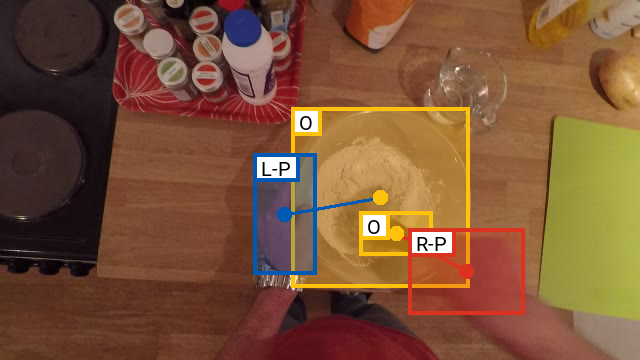

In [8]:
renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

In [9]:

@interact(frame_idx=IntSlider(value=13403, min=0, max=max_frame_idx, layout=Layout(width='650px')))
def render_detections(frame_idx):
    return renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

interactive(children=(IntSlider(value=13403, description='frame_idx', layout=Layout(width='650px'), max=214269…